In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train,x_test = x_train/255.0, x_test/255.0

In [4]:
y_train = y_train.flatten()  # Call the flatten method to get the flattened array
y_test = y_test.flatten()  # Call the flatten method to get the flattened array

In [5]:
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')   # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.2847 - loss: 1.8914 - val_accuracy: 0.4987 - val_loss: 1.3607
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 49ms/step - accuracy: 0.5253 - loss: 1.3343 - val_accuracy: 0.5796 - val_loss: 1.1759
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.5937 - loss: 1.1614 - val_accuracy: 0.6364 - val_loss: 1.0285
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.6378 - loss: 1.0460 - val_accuracy: 0.6461 - val_loss: 1.0073
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6612 - loss: 0.9630 - val_accuracy: 0.6811 - val_loss: 0.9171
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6877 - loss: 0.8907 - val_accuracy: 0.6963 - val_loss: 0.8749
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.7108 - loss: 0.8304 - val_accuracy: 0.6869 - val_loss: 0.8972
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.7183 

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7088 - loss: 0.8413
Test Loss: 0.8308460116386414, Test Accuracy: 0.7128999829292297


In [9]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.84      0.86      0.85      1000
           2       0.62      0.57      0.60      1000
           3       0.50      0.57      0.53      1000
           4       0.62      0.73      0.67      1000
           5       0.67      0.55      0.61      1000
           6       0.79      0.76      0.77      1000
           7       0.75      0.74      0.75      1000
           8       0.82      0.85      0.83      1000
           9       0.78      0.79      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



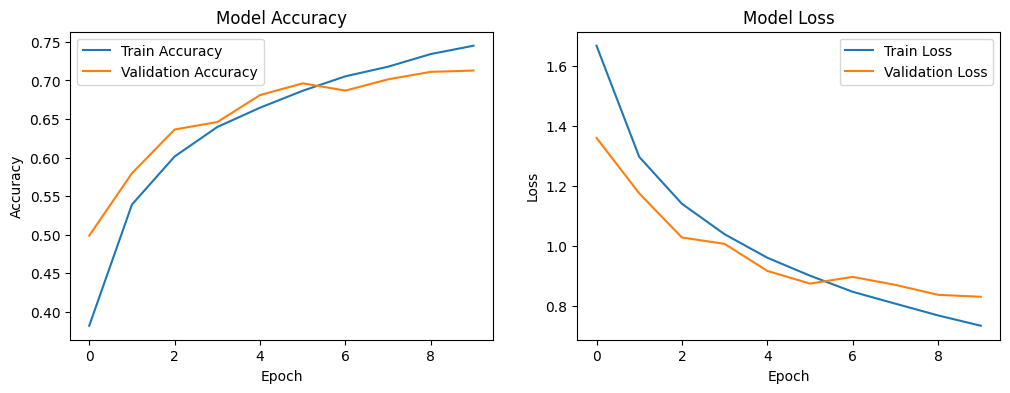

In [10]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()